## Python Exercise 4

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
import textwrap
import re

In [2]:
df = pd.read_csv('D:\Shivam\Python Ex\zomato_bang.csv')

In [3]:
print(df.shape)
df.head()

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# checking null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
#checking that is there any special character present in the data 
df.isin(['-']).sum()

url                             0
address                         0
name                            0
online_order                    0
book_table                      0
rate                           69
votes                           0
phone                           0
location                        0
rest_type                       0
dish_liked                      0
cuisines                        0
approx_cost(for two people)     0
reviews_list                    0
menu_item                       0
listed_in(type)                 0
listed_in(city)                 0
dtype: int64

In [6]:
# missing value imputation using mean
columns = [col for col in df.columns if df[col].dtypes != 'object']
imputer = SimpleImputer(strategy='mean') 
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

In [7]:
# missing value imputation using mode
columns = [col for col in df.columns if df[col].dtypes == 'object']
imputer = SimpleImputer(strategy='most_frequent') 
imputer.fit(df[columns])
df[columns] = pd.DataFrame(imputer.transform(df[columns]),columns=columns)

In [8]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

## I. Identify the most popular restaurants in the city.

In [9]:
#checking the unique values in rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
#replacing NEW to 0
df['rate'] = df['rate'].str.replace('NEW','0')

In [11]:
df['rate'].max()

'4.9/5'

In [12]:
data = df[df['rate'] == df['rate'].max()].reset_index(drop=True)

### most popular restaurants in the city

In [13]:
data['name'].unique()

array(['Byg Brewski Brewing Company', 'Belgian Waffle Factory',
       'Flechazo', 'Punjab Grill', "AB's - Absolute Barbecues",
       'Asia Kitchen By Mainland China', 'Milano Ice Cream'], dtype=object)

## II. Analyze the relationship between restaurant rating and price.

In [14]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
# Data Preprocessing
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('float64')
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].str.replace(' ', '').str.replace('/5', '').str.replace('-','0.0')
df['rate'] = df['rate'].astype('float64')

Correlation Coefficient: 0.31
------------------------------------------------------------------------------------------------------------------------


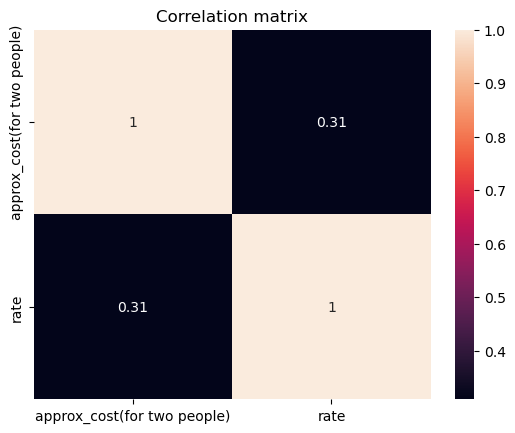

In [17]:
# Calculate the correlation coefficient
correlation_coefficient = df['approx_cost(for two people)'].corr(df['rate'])
print("Correlation Coefficient:", round(correlation_coefficient,2))
print('-'*120)
sns.heatmap(df[['approx_cost(for two people)','rate']].corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

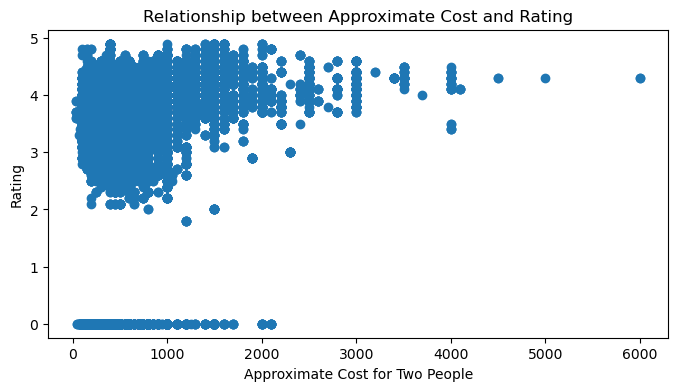

In [18]:
# Visualization
plt.figure(figsize=(8, 4))
plt.scatter(df['approx_cost(for two people)'], df['rate'])
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Rating')
plt.title('Relationship between Approximate Cost and Rating')
plt.show()


In [19]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## III. Identify the most popular cuisines in the city.

In [20]:
#filtering the df with maximum rate and votes
data = df[(df['rate'] == df['rate'].max()) & (df['votes'] == df['votes'].max())]

### most popular cuisines in the city

In [21]:
data = data[['cuisines','listed_in(city)']].drop_duplicates().reset_index(drop=True)

In [22]:
print("The most popular cuisines is: ", data['cuisines'][0],'\n','In city: ', data['listed_in(city)'][0])

The most popular cuisines is:  Continental, North Indian, Italian, South Indian, Finger Food 
 In city:  Sarjapur Road


## IV. Which restaurant has the highest number of votes?

In [23]:
df[df['votes'] == df['votes'].max()]['name'].unique()

array(['Byg Brewski Brewing Company'], dtype=object)

### Byg Brewski Brewing Company has the highest number of votes

## V. How many restaurants belong to each restaurant type (e.g., cafe, bar, bakery, etc.)?

### These are the restaurants which belong to each restaurant type (e.g., cafe, bar, bakery, etc.)

In [24]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19359
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

## VI. How many restaurant take online order.

In [25]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
data = df[df['online_order'] == 'Yes']

### These restaurants take online order

In [27]:
data['name'].tolist()

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Timepass Dinner',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'San Churro Cafe',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'My Tea House',
 'Coffee Tindi',
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 "McDonald's",
 "Domino's Pizza",
 'Onesta',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Shree Cool Point',
 'Biryanis And More',
 'FreshMenu',
 'Banashankari Donne Biriyani',
 'Wamama',
 'XO Belgian Waffle',
 'Goa 0 Km',
 'Chinese Kitchen',
 'Kabab Magic',
 "Namma Brahmin's Idli",
 'Burger King',
 'The Good Bowl',
 'Sri Guru Kottureshwara

In [28]:
data['name'].nunique()

4418

## VII. Can we identify any popular menu items across different restaurants?

In [29]:
data = df[(df['rate'] == df['rate'].max()) & (df['book_table'] == 'Yes')] #& (df['votes'] == df['votes'].max())]

In [30]:
data.reset_index(drop=True,inplace=True)

In [31]:
data = data[['name','menu_item']]

In [32]:
# renmoving blank menu item
data[~data['menu_item'].isin(['[]'])].drop_duplicates().reset_index(drop=True)

,name,menu_item
0,Byg Brewski Brewing Company,"['Creamy Mushroom and Truffle Soup', 'Kung Pao..."
1,Byg Brewski Brewing Company,"['Creamy Mushroom and Truffle Soup', 'Kung Pao..."
2,Asia Kitchen By Mainland China,"['Vegetable Eight Treasure Soup', 'Chicken Swe..."
3,Asia Kitchen By Mainland China,"['Vegetable Eight Treasure Soup', 'Chicken Hot..."
4,Asia Kitchen By Mainland China,"['Vegetable Eight Treasure Soup', 'Chicken Swe..."
5,Punjab Grill,"['Fish Amritsari', 'Murgh Fatehwal', 'Nalli Go..."
6,Punjab Grill,"['Fish Amritsari', 'Murgh Fatehwal', 'Nalli Go..."


### We can identify popular menu items across different restaurants but ignoring votes to calculate popular menu item 